# 1. The Learning Problem


* We learn from data.  
* E.g. Trees
    * 3 year old knows what a tree is
    * 30 year old may be less sure
    * we did not learn what a tree is from a mathematical definition, learned from examples (data)
* Useful to learn from data in situations where we don't have an analytic solution but have data about phenonmenon

* Goals for Chapter 1:
    * present examples of learning from data
    * formalize the learning problem
    * discuss concepts associated with learning
    * discuss different paradigms of learning

## 1.1 Problem Setup

* Several applications have successfuly utilized `learning from data`
* e.g. predict how movie viewer will rate a movie
    * very practical problem for netflix for renting movies
    * Netflix offered \$10M prize for anyone who could improve their recommendations by 10%
    * criteria viewer may rate movie on is complex
    * but historical rating data may offer a clue!
    * movie rental/streaming companies ask  users to rate movies they've seen
* Netflix approach:
    * describe a movie as a long array of different factors (comdey, complicated plot, hot lead actor, etc.)
    * describe how much a user likes comedy, intricate plot, hot lead actor, etc.
    * use information to predict how much a movie viewer will like a particular film.
* algorithms can `learn` this from the data.  Algos can `reverse engineer` categories.
* Algorithms create their own features for films that may not map `exactly` to our classification categories, and may not even correspond to things we find comprehensible.

### 1.1.1 Components of Learning
* Use model for credit approval decsion as example of the learning problem

* Scenario: 
    * bank receives credit card applications and wishes to automate the process of evaluating them
    * bank doesn't have a magical formula for determining an applicants creditworthiness
    * bank *does* have reams and reams of data
    * bank can therefore _likely_ learn from the data to estimate a function of creditworthiness.
    * customer data, specifically.  each customer the bank currently has will have a recored for several data points.

* Main components of this learning problem:
    * $\bf{x}$ customer information to be used to make a credit decision
    * $f : \mathcal{X} \rightarrow \mathcal{Y}$: the unknown target function $f$
        * $\mathcal{X}$ is the input space (set of all possible inputs of $\bf{x}$, or domain of $f$.
    * $\mathcal{D}$ is the set of input/output examples 
        * $( \bf{x}_{1}, y_1)$, $(\bf{x}_2, y_2)$, ...  where 
        * $y_n = f(x_n)$.
        * $\mathcal{D}$ is also referred to as the data.
    * $g : \mathcal{X} \rightarrow \mathcal{Y}$ is the equation the **learning algorithm** uses to approximate $f$.
    * $\mathcal{H}$ is the **hypothesis set**, the set of functions from which the **learning algorithm** selects $g$.

* Bank will use $g$ to determine whether or not to extend credit to an individual.  This will be a good choice only insofar as $f$ approximates $g$ well.

* algorithm will use records of previous customers to attempt to find a $g$ that approximates $f$ well.

* The basic criteria for applying Learning form data are
    1. there is a target to be learned
    1. the target is unknown to us
    1.  we have a set of examples generated by the target
    1. The learning algorithm uses these examples to look for a hypothesis that approximates the target

#### Exercise 1.1
Express each of the following tasks in the framework of learning from data by specifying the input space $\mathcal{X}$, output space $\mathcal{Y}$, target function $f: \mathcal{X} \rightarrow \mathcal{Y}$ and the specifics of the data set that we will learn from.

**a) Medical diagnosis: Apatient walks in with a medical history and some sypmtoms and you want to identify the problem.**


**b) Hadwritten digit recognition (for example postal zip code recognition for mail sorting)**

**c) Determining if an email is spam or not**

**d) Predicting how an electric load varies with price, temperature, and day of the week.**

**e) A problem of interest to you for which there is no analytic solution, but you have data from which to construct an empirical solution**

### 1.1.2 A simple Learning Model

* Need to choose the learning algorithm and hypothesis set
* simplified model:
    * let $\mathcal{X} = \mathbb{R}^d$ be the input space
    * let $\mathcal{Y} = \{+1, -1\}$ be the output space (yes/no decision)
    * specify $\mathcal{H}$ through a functional form to be a linear combination of the elements of ${\bf x} \in \mathcal{X}$
    * $h(\bf{x})$ gives different weights to each factor, giving their relative importance to the decision
    * approve credit if $\sum^d_{i=1}w_ix_i > \text{threshold}$
    * deny credit if $\sum^d_{i=1}w_ix_i \leq \text{threshold}$
    * or, more compactly, $h({\bf x}) = \text{sign}\big(\sum^d_{i=1}w_ix_i + b\big)$, and $h(x) == 1$ corresponds to approve, $h(x) == -1$ to deny.
    * this model is called the **Perceptron*
* learning algo will search $\mathcal{H}$ to find a set of weights and a bias $b$ that perform well on the dataset.

#### Exercise 1.2
Suppose that we use a perceptron to detect spam message.  Let's say that each email message is represented by the frequency of occurrence of keywords, and the output is $+1$ if the message is considered spam.
**a) can you think of some keywodes that will end up with a large positive weight in the perceptron?**
Viagra, free, limited, cialis, local, singles, lose, weight, working from home, etc.

**b) How about keywords that will get a negative weight?**
next weekend, university, billing statement, etc.

**c) What parameter in the perceptron wdirectly affects how many border-line messages end up being classified as spam?**
The bias term.

* different values for $w$ correspond to different hyperplanes.  
* if the dataset is _linearly separable_, then a perfec classification will exist
* simplify perceptron formula: inset a weight $w_0 = b$ and fill in the corresponding column in the dataset with $1$'s.
* now the input space is $\mathcal{X} = \{1\} \times \mathbb{R}^d = \{[x_0, x_1, \ldots, x_d]^\intercal | x_0=1, x_1 \in \mathbb{R}, \ldots, x_d \in \mathbb{R} \}$
* and $h({\bf x}) = \text{sign}({\bf w}^\intercal {\bf x})$
* **Perceptron Learning Algorithm (PLA)**
    * determines what $w$ should be, based on the data.
    * algorithm:
    ```for each iteration, t:  w(t+1) := w(t) + y(t)x(t), when y(t) is the first encountered misclassification```
    * moves decision boundary in direction of correctness
    * algorithm continues until there are now more misclassifications

#### Exercise 1.3
The weight update rule in 1.3 has the nice interpretation that it moves in the direction of classifying $x(t)$ correctly.

**a) Show that $y(t){\bf w}^\intercal (t) {\bf x} (t) < 0)$. [Hint: ${\bf x}(t)$ is misclassified by ${\bf w}(t)$]**

**b) Show that $y(t){\bf w}^\intercal (t+1) {\bf x} (t) > y(t){\bf w}^\intercal (t) {\bf x} (t)$**

**c) As far as classifying $x(t)$ is concerned, argue that the move from ${\bf w} (t)$ to ${\bf w} (t+1)$ is a move 'in the right direction'**

#### Exercise 1.4

Create a target function $f$ and dataset $\mathcal{D}$ and see how the perceptron learning algorithm works.  Let $d=2$ and visualize the problem.  Choose a random line in the plane as target function, where one side maps to +1 and the other to -1.  Chose the inputs of X randomly and evaluate the target function on each ${\bf x}_n$ to get the corresponding output $y_n$.

Generate a dataset of size 20.  Try the perceptron learning algorithm on your dataset and see how long it takes to converge and how well g matches f.

(200,)
[ 0.41599587 -0.2524157 ] [-0.76771303  0.24220404  0.3553977   0.39168358 -0.40502206  0.07062432
  0.8558635   0.02461427 -0.11993434  0.83990069 -0.32481852  0.8991283
  0.67779905 -0.09802451  0.43655936 -0.04282649  0.03646631 -0.15150905
 -0.35622346 -0.41685192] [-0.22665732 -0.73538533  0.69307108 -0.35762744 -0.61545344  0.26609109
 -0.78622316 -0.17074194  0.7870247   0.35194072  0.09935717  0.8703004
  0.99092009 -0.61018812  0.93574551 -0.8801571  -0.46386935 -0.46707434
  0.64383819  0.75237201] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


<Figure size 1440x720 with 0 Axes>

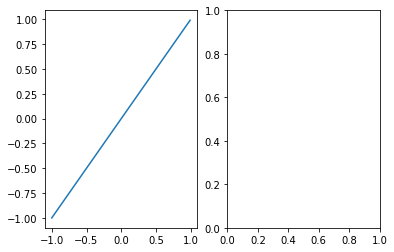

In [79]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# create figure
plt.figure( figsize = (20, 10))
fig, axs = plt.subplots(1, 2)

# create random f (function)
w = np.random.rand(2)*2 - 1

axs[0].plot(  )


x = np.random.rand(20) * 2 - 1.0
y = np.random.rand(20) * 2 - 1.0
ones = np.ones(20)


print(w, x, y, ones)

### 1.1.3 Learning versus Design

## 1.2 Types of Learning

### 1.2.1 Supervised Learning

### 1.2.2 Reinforcement Learning

### 1.2.3 Unsupervised Learning

### 1.2.4 Other Views of Learning

## 1.3 Is Learning Feasible

### 1.3.1 Outside the Data Set

### 1.3.2 Probability to the Rescue

### 1.3.3 Feasibility of Learning

## 1.4 Error and Noise

### 1.4.1 Error Measures

### 1.4.2 Noisy Targets

## 1.5 Problems